In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

Setting environment for Local Macbook Pro


In [2]:
atlas_name = 'atlasV5'
# atlasV6 added the outline; everything else is the same as atlasV5

In [3]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
warp_setting = 9

In [4]:
ann_vol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotation', downscale=32)
print 'annotation volume bbox (rel2uncropped):', ann_vol_bbox_rel2uncropped

annotation volume bbox (rel2uncropped): [ 622 1042  155  502  128  503]


# Compute mean positions

## Compute centroids of all instances of all structures in MD589 space

In [7]:
instance_centroids_rel2fixed = defaultdict(list)

# for name_u in ['7N']:
for name_u in all_known_structures:
    print name_u
    
    if name_u in paired_structures:
        lname = convert_to_left_name(name_u)
        rname = convert_to_right_name(name_u)
    else:
        lname = name_u
        rname = name_u
    
    try:
        right_instance_vol = DataManager.load_original_volume(stack=stack_fixed,  downscale=32, volume_type='annotationAsScore', structure=rname)
        right_instance_vol_bbox = np.array(bbox_3d(right_instance_vol))
        right_instance_vol_inbbox = crop_and_pad_volume(right_instance_vol, out_bbox=right_instance_vol_bbox)
        
        instance_centroid_rel2fixed = np.mean(np.nonzero(right_instance_vol_inbbox), axis=1)[[1,0,2]] + right_instance_vol_bbox[[0,2,4]]
        instance_centroids_rel2fixed[rname].append(instance_centroid_rel2fixed)
        
    except Exception as e:
        print e
        continue

    try:
        left_instance_vol = DataManager.load_original_volume(stack=stack_fixed, downscale=32, volume_type='annotationAsScore', structure=lname)
        left_instance_vol_bbox = np.array(bbox_3d(left_instance_vol))
        left_instance_vol_inbbox = crop_and_pad_volume(left_instance_vol, out_bbox=left_instance_vol_bbox)
        
        instance_centroid_rel2fixed = np.mean(np.nonzero(left_instance_vol_inbbox), axis=1)[[1,0,2]] + left_instance_vol_bbox[[0,2,4]]
        instance_centroids_rel2fixed[lname].append(instance_centroid_rel2fixed)

    except Exception as e:
        print e
        continue        

    for stack_moving in stacks_moving:

        try:
            left_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            warp_setting=warp_setting,
                                                            structure=lname)
            left_instance_vol_bbox_rel2fixed = DataManager.load_transformed_volume_bbox(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=lname)
            instance_centroid_rel2fixed = np.mean(np.nonzero(left_instance_vol), axis=1)[[1,0,2]] + left_instance_vol_bbox_rel2fixed[[0,2,4]]
            instance_centroids_rel2fixed[lname].append(instance_centroid_rel2fixed)
        except Exception as e:
            print e
            continue 

        try:
            right_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            right_instance_vol_bbox_rel2fixed = DataManager.load_transformed_volume_bbox(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            instance_centroid_rel2fixed = np.mean(np.nonzero(right_instance_vol), axis=1)[[1,0,2]] + right_instance_vol_bbox_rel2fixed[[0,2,4]]
            instance_centroids_rel2fixed[rname].append(instance_centroid_rel2fixed)
        except Exception as e:
            print e
            continue 


5N
6N
7N
7n
Amb
LC
LRt
Pn
Tz
VLL
RMC
SNC
SNR
3N
4N
Sp5I
Sp5O
Sp5C
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp'
PBG
10N
VCA
VCP
DC
AP
12N
RtTg
SC
IC


In [9]:
instance_centroids_rel2fixed.default_factory = None

In [42]:
fp = DataManager.get_instance_centroids_filepath(atlas_name=atlas_name)
save_pickle(instance_centroids_rel2fixed, fp)
upload_to_s3(fp)

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_instanceCentroids.pkl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_instanceCentroids.pkl"


## Load instance centroids

In [5]:
fp = DataManager.get_instance_centroids_filepath(atlas_name=atlas_name)
instance_centroids_rel2fixed = load_pickle(fp)

In [8]:
instance_centroids_rel2canon = {name_s: np.array(instance_centroids) - canonical_centroid_rel2fixed
                                for name_s, instance_centroids in instance_centroids_rel2fixed.iteritems()}

## Average the centroids

In [7]:
nominal_locations_rel2canon, canonical_centroid_rel2fixed, canonical_normal = \
average_location(instance_centroids_rel2fixed)

canonical_centroid_rel2uncropped = canonical_centroid_rel2fixed + ann_vol_bbox_rel2uncropped[[0,2,4]]
print 'canonical_centroid_rel2uncropped', canonical_centroid_rel2uncropped

[ 0.04111027 -0.09160432  0.99494653] @ [ 172.0630378   223.21016434  186.74030921]
canonical_centroid_rel2uncropped [ 794.0630378   378.21016434  314.74030921]


Asked for left name for singular structure 12N, returning itself.
Asked for right name for singular structure 12N, returning itself.
Asked for left name for singular structure AP, returning itself.
Asked for right name for singular structure AP, returning itself.
Asked for left name for singular structure IC, returning itself.
Asked for right name for singular structure IC, returning itself.
Asked for left name for singular structure SC, returning itself.
Asked for right name for singular structure SC, returning itself.
Asked for left name for singular structure RtTg, returning itself.
Asked for right name for singular structure RtTg, returning itself.
Asked for left name for singular structure 12N, returning itself.
Asked for right name for singular structure 12N, returning itself.
Asked for left name for singular structure AP, returning itself.
Asked for right name for singular structure AP, returning itself.
Asked for left name for singular structure IC, returning itself.
Asked for 

In [9]:
nominal_locations_rel2fixed = {k: canonical_centroid_rel2fixed + c for k, c in nominal_locations_rel2canon.iteritems()}

In [10]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.76256199381


In [11]:
cov_mat_allStructures, radii_allStructures, ellipsoid_matrix_allStructures = \
compute_covar_from_instance_centroids(instance_centroids_rel2fixed)

In [20]:
# Manually coerce 2D ellipsoid to 3D.

for k in sorted(all_known_structures_sided):
    orig_radii = radii_allStructures[k]
    new_radii = orig_radii.copy()
    new_radii[2] = 1 # manually assign a radius on the third direction.
    D = np.diag(new_radii)
    cov_mat_allStructures[k] = np.dot(ellipsoid_matrix_allStructures[k].T, np.dot(D**2, ellipsoid_matrix_allStructures[k]))

In [21]:
for s, cov_mat in cov_mat_allStructures.iteritems():
    covar_fp = DataManager.get_prior_covariance_matrix_filepath(atlas_name=atlas_name, structure=s)
    create_parent_dir_if_not_exists(covar_fp)
    bp.pack_ndarray_file(cov_mat, covar_fp)

In [22]:
canonical_centroid_rel2fixed

array([ 172.0630378 ,  223.21016434,  186.74030921])

In [26]:
from utilities2015 import *

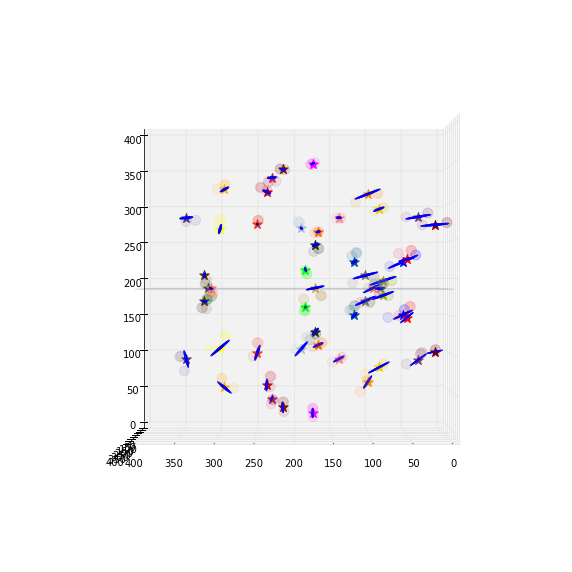

In [27]:
plot_centroid_means_and_covars_3d(
    instance_centroids=instance_centroids_rel2canon, 
    cov_mat_allStructures=cov_mat_allStructures,
                                  nominal_locations=nominal_locations_rel2canon,
                                  canonical_centroid=canonical_centroid_rel2fixed,
                                show_canonical_centroid=False,
#                                  canonical_normal=canonical_normal,
                                canonical_normal=[0,0,1],
    colors={name_s: np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.
            for name_s in nominal_locations_rel2canon.keys()})

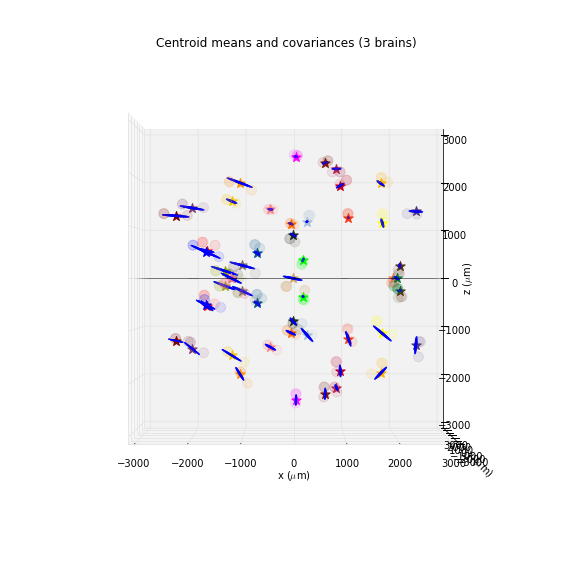

In [38]:
# Unit in microns, center at (0,0,0)

instance_centroids_rel2canon_um = \
{s: v * XY_PIXEL_DISTANCE_LOSSLESS * 32
 for s, v in instance_centroids_rel2canon.iteritems()}

nominal_locations_rel2canon_um = {s: v * XY_PIXEL_DISTANCE_LOSSLESS * 32
                                          for s, v in nominal_locations_rel2canon.iteritems()}

cov_mat_allStructures_um = {s: v * (XY_PIXEL_DISTANCE_LOSSLESS * 32)**2 for s, v in cov_mat_allStructures.iteritems()}

plot_centroid_means_and_covars_3d(instance_centroids=instance_centroids_rel2canon_um,
                                      cov_mat_allStructures=cov_mat_allStructures_um,
                                 nominal_locations=nominal_locations_rel2canon_um,
                                 canonical_centroid=(0,0,0),
                                  show_canonical_centroid=False,
                                  canonical_normal=[0,0,1],
                                 colors={name_s: np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.
                                        for name_s in instance_centroids_rel2canon_um.keys()},
                                 xlim=[-3000, 3000],
                                 ylim=[-3000, 3000],
                                 zlim=[-3000, 3000],
                                 xlabel='x ($\mu$m)',
                                 ylabel='y ($\mu$m)',
                                 zlabel='z ($\mu$m)',
                                 title='Centroid means and covariances (3 brains)')

In [51]:
np.savetxt(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name), canonical_centroid_rel2uncropped)
np.savetxt(DataManager.get_atlas_canonical_normal_filepath(atlas_name=atlas_name), canonical_normal)
save_pickle(nominal_locations_rel2canon, DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name))

# Compute mean shapes

In [43]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
warp_setting = 9

In [ ]:
instance_volumes = defaultdict(list)
instance_source = defaultdict(list)

moving_vol_aligned2template_inbbox_allInstances_allStructures = defaultdict(list)
moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures = defaultdict(list)
scores_allInstances_allStructures = defaultdict(list)
scores_allInstances_allStructures_allLearningRates = defaultdict(lambda: defaultdict(list))

structure_mean_shape_allStructures = {}
structure_origin_rel2templateCentroid_allStructures = {}
structure_mean_mesh_rel2templateCentroid_allStructures = {}

instance_aligned2template_meshes_rel2templateCentroid_allStructures = defaultdict(list)
template_meshes_rel2templateCentroid_allStructures = {}
template_vol_centroids_rel2template_allStructures = {}

# for name_u in ['7N']:
for name_u in all_known_structures:
    print name_u
    
    if name_u in paired_structures:
        lname = convert_to_left_name(name_u)
        rname = convert_to_right_name(name_u)
    else:
        lname = name_u
        rname = name_u
    
    try:
        right_instance_vol = DataManager.load_original_volume(stack=stack_fixed,  downscale=32, volume_type='annotationAsScore', structure=rname)
        right_instance_vol_bbox = np.array(bbox_3d(right_instance_vol))
        right_instance_vol_inbbox = crop_and_pad_volume(right_instance_vol, out_bbox=right_instance_vol_bbox)
        instance_volumes[name_u].append(right_instance_vol_inbbox) # if right, do not mirror
        instance_source[name_u].append((stack_fixed, 'R'))
    except Exception as e:
        continue

    try:
        left_instance_vol = DataManager.load_original_volume(stack=stack_fixed, downscale=32, volume_type='annotationAsScore', structure=lname)
        left_instance_vol_bbox = np.array(bbox_3d(left_instance_vol))
        left_instance_vol_inbbox = crop_and_pad_volume(left_instance_vol, out_bbox=left_instance_vol_bbox)
        instance_volumes[name_u].append(left_instance_vol_inbbox[..., ::-1]) # if left, mirror
        instance_source[name_u].append((stack_fixed, 'L'))
    except:
        continue        

    for stack_moving in stacks_moving:

        try:
            left_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            warp_setting=warp_setting,
                                                            structure=lname)
            instance_volumes[name_u].append(left_instance_vol[..., ::-1]) # if left, mirror
            instance_source[name_u].append((stack_moving, 'L'))
        except:
            continue

        try:
            right_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            instance_volumes[name_u].append(right_instance_vol) # if right, do not mirror
            instance_source[name_u].append((stack_moving, 'R'))
        except:
            continue
            
    ############################################
    
    template_vol = instance_volumes[name_u][0]
    
    template_vol_centroid_rel2template = np.mean(np.nonzero(template_vol), axis=1)[[1,0,2]]
    template_vol_centroids_rel2template_allStructures[name_u] = template_vol_centroid_rel2template

    for i in range(1, len(instance_volumes[name_u])):

        moving_vol = instance_volumes[name_u][i]

        aligner = Aligner4({0:template_vol}, {0:moving_vol}, labelIndexMap_m2f={0:0})
        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid')

#         grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_sample_number=5,
#                       std_tx=30, std_ty=30, std_tz=30, std_theta_xy=0,
#                        grid_search_eta=3., stop_radius_voxel=2)
        
        gy, gx, gz = np.gradient(template_vol)
        gradients = {0: np.array([gx, gy, gz])}
        aligner.load_gradient(gradients=gradients)

#         for lr in [.1, 1, 10]:
#             T, scores = aligner.optimize(tf_type='rigid', 
#                                  history_len=50, 
#                                  terminate_thresh=1e-6,
#                                  grad_computation_sample_number=100000,
#                                          full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
#     #                                      init_T=grid_search_T
#                                 )

#             scores_allInstances_allStructures_allLearningRates[lr][name_u].append(scores)

        lr = 1.
        T, scores = aligner.optimize(tf_type='rigid', 
                             history_len=50, 
                             terminate_thresh=1e-6,
                            max_iter_num=100 if name_u in ['SC', 'IC'] else 1000,
                             grad_computation_sample_number=None,
                                full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
#                                      init_T=grid_search_T
                            )

        scores_allInstances_allStructures[name_u].append(scores)
        
        #################################
        
        moving_vol_aligned2template_inbbox, moving_vol_aligned2template_bbox_rel2template = transform_volume_v2(moving_vol, T, 
                                                                              centroid_m=aligner.centroid_m,
                                                                             centroid_f=aligner.centroid_f)

        moving_vol_aligned2template_bbox_rel2templateCentroid = \
        np.array(moving_vol_aligned2template_bbox_rel2template) - template_vol_centroid_rel2template[[0,0,1,1,2,2]]
        
        moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u].append(moving_vol_aligned2template_inbbox)
        moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u].append(moving_vol_aligned2template_bbox_rel2templateCentroid)  
    
    ########################################

#     fig, axes = plt.subplots(1, 5, figsize=(20,2))
#     for i, scores in enumerate(scores_allInstances_allStructures[name_u]):
#         axes[i].plot(scores)
#         axes[i].set_title('%s, %s, %s, %f' % ((name_u,) + instance_source[name_u][i+1] + (np.max(scores),)))
#     plt.show();
    
    #########################################

    for moving_vol_aligned2template, moving_vol_aligned2template_bbox_rel2templateCentroid in \
    zip(moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u], 
        moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u]):
        instance_aligned2template_mesh_rel2templateCentroid = volume_to_polydata(moving_vol_aligned2template, \
                                                            origin=np.array(moving_vol_aligned2template_bbox_rel2templateCentroid)[[0,2,4]], 
                           num_simplify_iter=3, smooth=True)
        instance_aligned2template_meshes_rel2templateCentroid_allStructures[name_u].append(instance_aligned2template_mesh_rel2templateCentroid)

    template_meshes_rel2templateCentroid_allStructures[name_u] = volume_to_polydata(template_vol, num_simplify_iter=3, smooth=True, origin=-template_vol_centroid_rel2template)
    
#     launch_vtk([actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1) 
#     for i, mesh in enumerate([template_mesh] + instance_aligned2template_meshes_allStructures[name_u])], 
#           background_color=(1,1,1))
    
    ##########################################
    # Save instances data
    
    for s, instance_aligned2template_meshes_rel2templateCentroid in instance_aligned2template_meshes_rel2templateCentroid_allStructures.iteritems():

        fp = DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=s, index=0)
        create_parent_dir_if_not_exists(fp)
        save_mesh_stl(template_meshes_rel2templateCentroid_allStructures[s], fp)
        upload_to_s3(fp)
        
        for i, m in enumerate(instance_aligned2template_meshes_rel2templateCentroid):
            fp = DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=s, index=i+1)
            save_mesh_stl(m, fp)
            upload_to_s3(fp)
            
        fp = DataManager.get_instance_sources_filepath(atlas_name=atlas_name, structure=s)
        create_parent_dir_if_not_exists(fp)
        save_pickle(instance_source[s], fp)
        upload_to_s3(fp)        
    
    #########################################
    
    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.

    structure_mean_shape, structure_origin_rel2templateCentroid, structure_mean_mesh_rel2templateCentroid = \
        average_shape(volume_list=moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u], \
                      origin_list=[(b_rel2templateCentroid[0], b_rel2templateCentroid[2], b_rel2templateCentroid[4])
                                   for b_rel2templateCentroid in moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u]],
                      consensus_percentage=.5,
                      num_simplify_iter=3, smooth=True,
                      force_symmetric=(name_u in singular_structures), 
                      sigma=sigma)
    
    structure_mean_shape_allStructures[name_u] = structure_mean_shape
#     structure_origin_rel2template_allStructures[name_u] = structure_origin_rel2template    
#     structure_mean_mesh_rel2template_allStructures[name_u] = structure_mean_mesh_rel2template
    structure_origin_rel2templateCentroid_allStructures[name_u] = structure_origin_rel2templateCentroid    
    structure_mean_mesh_rel2templateCentroid_allStructures[name_u] = structure_mean_mesh_rel2templateCentroid
    
    ########################################
    # Save mean shape data
    
    fp = DataManager.get_structure_mean_mesh_filepath(atlas_name=atlas_name, structure=name_u)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(structure_mean_mesh_rel2templateCentroid, fp)
    upload_to_s3(fp)
    
    fp = DataManager.get_structure_mean_shape_filepath(atlas_name=atlas_name, structure=name_u)
    bp.pack_ndarray_file(structure_mean_shape, fp)
    upload_to_s3(fp)
    
    fp = DataManager.get_structure_mean_shape_origin_filepath(atlas_name=atlas_name, structure=name_u)
    np.savetxt(fp, structure_origin_rel2templateCentroid)
    upload_to_s3(fp)
    
    ##########################################
    
#     launch_vtk([
#     actor_mesh(structure_mean_mesh_rel2template_allStructures[name_u], wireframe=True, opacity=1., color=(1,0,0)),
#     actor_volume(structure_mean_shape_allStructures[name_u].astype(np.float32), what='probability',
#                 origin=structure_origin_rel2template_allStructures[name_u], c=(0,1,0)),
# ], background_color=(0,0,0))

    ######################################
    
instance_volumes.default_factory = None
instance_source.default_factory = None
moving_vol_aligned2template_inbbox_allInstances_allStructures.default_factory = None
moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures.default_factory = None
scores_allInstances_allStructures.default_factory = None
scores_allInstances_allStructures_allLearningRates.default_factory = None
instance_aligned2template_meshes_rel2templateCentroid_allStructures.default_factory = None

In [ ]:
for structure, scores_allInstances in scores_allInstances_allStructures.iteritems():
    fig, axes = plt.subplots(1, 5, figsize=(20,2))
    for i, scores in enumerate(scores_allInstances):
        axes[i].plot(scores)
        axes[i].set_title('%s, %s, %s, %f' % ((name_u,) + instance_source[name_u][i+1] + (np.max(scores),)))
plt.show()

In [ ]:
launch_vtk([
#     actor_mesh(structure_mean_mesh_rel2template_allStructures[name_u], wireframe=True, opacity=1., color=(1,0,0)),
    actor_volume(structure_mean_shape_allStructures[name_u].astype(np.float32), what='probability',
                origin=structure_origin_rel2templateCentroid_allStructures[name_u], c=(0,1,0)),
] + \
    [actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1) 
for i, mesh in enumerate([template_meshes_rel2templateCentroid_allStructures[name_u]] + \
                         instance_aligned2template_meshes_rel2templateCentroid_allStructures[name_u])] + \
    [actor_sphere((0,0,0), radius=1, color=(0,0,0))], 
    background_color=(0,0,0))

In [ ]:
# viz

In [ ]:
# instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

# for structure in all_known_structures_sided:
# # for structure in ['IC']:

#     print structure
    
#     for direction in ['coronal', 'sagittal', 'horizontal']:

#         # Show each instance separately
#         for i, polydata in enumerate([structure]):
#             instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)

#             fp = DataManager.get_structure_viz_filepath(atlas_name=atlas_name, 
#                                                         structure=structure, suffix=direction+'_'+str(i))
#             create_parent_dir_if_not_exists(fp)
#             launch_vtk([instance_actors], snapshot_fn=fp, interactive=False, init_angle=direction)

#         # Show different instances shown aligned together
#         instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
#                            for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

#         icp_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                          structure=structure, suffix=direction+'_icpAligned')
#         launch_vtk(instance_actors, snapshot_fn=icp_fp, interactive=False, init_angle=direction)
# #         launch_vtk(instance_actors, init_angle=direction)
        
#         # Show voxel-voted probabilistic shape
#         prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
#                                         what='probability', origin=prob_shape_origin_allLandmarks[structure])

#         prob_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                          structure=structure, suffix=direction+'_probShape')
#         launch_vtk([prob_shape_actor], snapshot_fn=prob_shape_fp, interactive=False, init_angle=direction)
# #         launch_vtk([prob_shape_actor], init_angle=direction)

#         # Show voxel-voted probabilistic shape, thresholded at .5
#         actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
        
#         thresh_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                                 structure=structure, suffix=direction+'_thresh0.5')
#         launch_vtk([actor], snapshot_fn=thresh_shape_fp, interactive=False, init_angle=direction)
# #         launch_vtk([actor], init_angle=direction)

# Examine saved instance data

In [44]:
instance_meshes = []
for instance_index in range(6):
    instance_mesh_fp = DataManager.get_instance_mesh_filepath(atlas_name='atlasV5', structure='7N', index=instance_index)
    instance_mesh = load_mesh_stl(instance_mesh_fp, return_polydata_only=True)
    instance_meshes.append(instance_mesh)

In [45]:
mean_shape_fp = DataManager.get_structure_mean_shape_filepath(atlas_name='atlasV5', structure='7N')
mean_shape = bp.unpack_ndarray_file(mean_shape_fp)

In [46]:
mean_shape_origin_fp = DataManager.get_structure_mean_shape_origin_filepath(atlas_name='atlasV5', structure='7N')
mean_shape_origin = np.loadtxt(mean_shape_origin_fp)

In [47]:
launch_vtk([actor_volume(mean_shape.astype(np.float32), what='probability', origin=mean_shape_origin, c=(0,0,0))])

In [48]:
launch_vtk([actor_mesh(m, color=np.array(random_colors(1)[0])/255., wireframe=True) 
            for m in instance_meshes] + \
          [actor_volume(mean_shape.astype(np.float32), what='probability', origin=mean_shape_origin, c=(0,0,0))])

In [16]:
launch_vtk([actor_mesh(m, color=np.array(random_colors(1)[0])/255., wireframe=True) 
            for m in instance_meshes] + \
          [actor_volume((mean_shape>0.5).astype(np.float32), 
                        what='probability', origin=mean_shape_origin, c=(0,0,0))])

In [15]:
launch_vtk([actor_mesh(instance_meshes[5], color=np.array(random_colors(1)[0])/255., wireframe=True)] + \
          [actor_volume((mean_shape>0.5).astype(np.float32), 
                        what='probability', origin=mean_shape_origin, c=(0,0,0))])

In [17]:
launch_vtk([actor_mesh(instance_meshes[5], color=np.array(random_colors(1)[0])/255., wireframe=True)] + \
          [actor_mesh(volume_to_polydata(mean_shape, level=0.5, origin=mean_shape_origin),
                      color=(0,0,0), wireframe=True)])

marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds


# Load all necessary data

In [4]:
# Load canonical info

if atlas_name == 'atlasV6':
    nominal_locations_rel2canon = load_pickle(DataManager.get_structure_mean_positions_filepath(atlas_name='atlasV5'))
    canonical_centroid_rel2uncropped = np.loadtxt(DataManager.get_atlas_canonical_centroid_filepath(atlas_name='atlasV5'))    
else:
    nominal_locations_rel2canon = load_pickle(DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name))
    canonical_centroid_rel2uncropped = np.loadtxt(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name))

# Place mean shapes at mean positions; generate volumes.

In [5]:
structure_vol_origin_dicts_rel2canon = {}

for name_s in nominal_locations_rel2canon.keys():
    
    name_u = convert_to_original_name(name_s)
    
    if atlas_name == 'atlasV6':
        prob_shape = bp.unpack_ndarray_file(DataManager.get_structure_mean_shape_filepath(atlas_name='atlasV5', structure=name_u))
        prob_shape_origin_rel2structCentroid = np.loadtxt(DataManager.get_structure_mean_shape_origin_filepath(atlas_name='atlasV5', structure=name_u))
    else:
        prob_shape = bp.unpack_ndarray_file(DataManager.get_structure_mean_shape_filepath(atlas_name=atlas_name, structure=name_u))
        prob_shape_origin_rel2structCentroid = np.loadtxt(DataManager.get_structure_mean_shape_origin_filepath(atlas_name=atlas_name, structure=name_u))

    structure_centroid_rel2canon = nominal_locations_rel2canon[name_s]
    
    if name_s in singular_structures or parse_label(name_s)[1] == 'R':
        # Singular or Right - don't need mirroring
        structure_vol_origin_dicts_rel2canon[name_s] = (prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid)
    else:
        # Left - need mirroring
        structure_vol_origin_dicts_rel2canon[name_s] = mirror_volume(prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid*(1,1,-1))

# Convert to meshes

In [6]:
structure_meshes_rel2canon = {}

for name_s in nominal_locations_rel2canon.keys():
    
    name_u = convert_to_original_name(name_s)
    
    if atlas_name == 'atlasV6':
        vertices_rel2structCentroid, faces = load_mesh_stl(DataManager.get_structure_mean_mesh_filepath(atlas_name='atlasV5', structure=name_u))
    else:
        vertices_rel2structCentroid, faces = load_mesh_stl(DataManager.get_structure_mean_mesh_filepath(atlas_name=atlas_name, structure=name_u))

    structure_centroid_rel2canon = nominal_locations_rel2canon[name_s]
    
    if name_s in singular_structures or parse_label(name_s)[1] == 'R':
        # Singular or Right - don't need mirroring
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid + structure_centroid_rel2canon, 
                                                                faces=faces)
    else:
        # Left - need mirroring
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid*(1,1,-1) + structure_centroid_rel2canon, 
                                                                faces=faces)

In [177]:
# Save structure meshes with respect to canonical centroid.

for name_s, mesh_rel2canon in structure_meshes_rel2canon.iteritems():
    fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(mesh_rel2canon, fp)
    upload_to_s3(fp)

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_L.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_L.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_PBG_L.stl" "s3:

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Tz_L.stl" "s3://mou

# Define surrounds

In [57]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

surround size (in voxels): 13.5869565217


In [58]:
structure_surround_vol_origin_dicts_rel2canon = {}

In [59]:
for name_s, (vol, origin_rel2canon) in structure_vol_origin_dicts_rel2canon.iteritems():
    surr_vol, surr_vol_bbox_rel2canon = get_surround_volume_v2(vol, 
                                                          (origin_rel2canon[0], origin_rel2canon[0]+vol.shape[1]-1, 
                                      origin_rel2canon[1], origin_rel2canon[1]+vol.shape[0]-1, 
                                      origin_rel2canon[2], origin_rel2canon[2]+vol.shape[2]-1),
                        valid_level=valid_level, 
                        distance=surround_distance_voxel, prob=True)
    
    surr_name = convert_to_surround_name(name_s, margin=surround_distance_um)
    structure_surround_vol_origin_dicts_rel2canon[surr_name] = (surr_vol, np.array(surr_vol_bbox_rel2canon)[[0,2,4]])

# Shell

Just use MD589's shell, until we find a way to average the outlines.

In [7]:
from conversion import *

margin_um = 200
margin_tb = margin_um / XY_PIXEL_DISTANCE_TB

from scipy.ndimage.morphology import distance_transform_edt

# for stack in ['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']:
for stack in ['MD589']:
    
#     contours_valid_by_z = {}
    contour_prob_maps_by_sec = {}
    
    for sec in metadata_cache['valid_sections'][stack]:
                
        m = DataManager.load_thumbnail_mask_v3(stack, prep_id=2, section=sec)
        contours = find_contour_points(m, sample_every=1)[1]
        contours_valid = [cnt[(cnt[:,0] >= 1) & (cnt[:,1] >= 1)] for cnt in contours]
        
#         z = np.mean(DataManager.convert_section_to_z(stack, sec, downsample=32, z_begin=0))
#         contours_valid_by_z[z] = contours_valid[0]
        
        m2 = np.zeros_like(m, np.bool)
        for cnt in contours_valid:
            m2[cnt[:,1], cnt[:,0]] = 1
        distance_to_contour = distance_transform_edt(~m2)
        contour_prob_map = np.exp(-distance_to_contour**2/(2*margin_tb)**2)
        contour_prob_map[contour_prob_map < 1e-2] = 0
        contour_prob_maps_by_sec[sec] = contour_prob_map
        
outline_prob_volume, outline_prob_volume_bbox = images_to_volume(images=contour_prob_maps_by_sec, 
                                                                 voxel_size=(XY_PIXEL_DISTANCE_TB, XY_PIXEL_DISTANCE_TB, SECTION_THICKNESS/XY_PIXEL_DISTANCE_TB))

# outline_prob_volume_bbox (xm,xm,ym,ym) relative to cropped, (zm,zm) relative to uncropped.

crop_box = metadata_cache['cropbox']['MD589']
outline_prob_volume_bbox_rel2uncropped = np.array(outline_prob_volume_bbox) + (crop_box[0], crop_box[0], crop_box[2], crop_box[2], 0, 0)

display_volume_sections(outline_prob_volume, direction='z', ncols=5, cmap=plt.cm.gray, start_level=0)

KeyboardInterrupt: 

In [23]:
outline_prob_volume_origin_rel2canon = outline_prob_volume_bbox_rel2uncropped[[0,2,4]] - canonical_centroid_rel2uncropped

In [24]:
shell_vol_origin_dict_rel2canon = {'shell': (outline_prob_volume, outline_prob_volume_origin_rel2canon)}

# Generate atlas structure volumes in full-brain domain

In [9]:
# structure_pos_surr_shell_vol_origin_dicts_rel2canon = {}
# for d in [structure_vol_origin_dicts_rel2canon, structure_surround_vol_origin_dicts_rel2canon, shell_vol_origin_dict_rel2canon]:
#     structure_pos_surr_shell_vol_origin_dicts_rel2canon.update(d)

structure_pos_surr_shell_vol_origin_dicts_rel2canon = {}
for d in [structure_vol_origin_dicts_rel2canon, structure_surround_vol_origin_dicts_rel2canon]:
    structure_pos_surr_shell_vol_origin_dicts_rel2canon.update(d)

NameError: name 'structure_surround_vol_origin_dicts_rel2canon' is not defined

In [75]:
atlas_volumes, atlas_volume_bbox_rel2canon = \
convert_vol_bbox_dict_to_overall_vol(vol_origin_dict=structure_pos_surr_shell_vol_origin_dicts_rel2canon)

[autoreload of utilities2015 failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


In [78]:
atlas_volumes = {k: v.astype(np.float16) for k, v in atlas_volumes.iteritems()}

In [82]:
atlas_volume_bbox_rel2uncropped = atlas_volume_bbox_rel2canon + canonical_centroid_rel2uncropped[[0,0,1,1,2,2]]
atlas_volume_bbox_rel2uncropped = np.round(atlas_volume_bbox_rel2uncropped).astype(np.int)
print 'atlas_volume_bbox_rel2uncropped:', atlas_volume_bbox_rel2uncropped

atlas_volume_bbox_rel2uncropped: [ 587 1052  133  526  109  521]


In [85]:
# Save full-brain atlas volumes.

for name_s, vol in atlas_volumes.iteritems():
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save atlas score volume bbox txt.
    fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=name_s)
    np.savetxt(fp, atlas_volume_bbox_rel2uncropped[None,:], fmt='%d')
    upload_to_s3(fp)
    # This is wrt aligned uncropped volume

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Tz_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Tz_L_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Tz_L_surround_200_bbox.txt" "s3://mouseb

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_R.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNC_L.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNC_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atla

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_DC_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_DC_R_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_DC_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_DC_R_surround_200_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VLL_L.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VLL_L_bbox.txt" 

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_surround_200_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolum

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_surround_200_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_6N_L_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scor

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_R.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/a

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_RtTg_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_RtTg_surround_200_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_L_surround_200.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_L_surround_200_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5

## Surround

In [ ]:
# # Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

# valid_level = .5

# surround_distance_um = 200
# surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
# print "surround size (in voxels):", surround_distance_voxel

In [ ]:
# for name_s, vol in atlas_volumes.iteritems():
#     if name_s == 'shell':
#         # for shell, do not compute surround, because it is 
#         continue
    
#     if name_s in singular_structures:
#         vol = symmetricalize_volume(vol)

#     surround_vol = get_surround_volume(vol, valid_level=valid_level, distance=surround_distance_voxel, prob=True)
#     vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, 
#                                              structure=convert_to_surround_name(name_s, margin=surround_distance_um))
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(surround_vol.astype(np.float16), vol_fp)
#     upload_to_s3(vol_fp)

#     fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=convert_to_surround_name(name_s, margin=surround_distance_um))
#     np.savetxt(fp, atlas_volume_bbox_rel2uncropped[None,:], fmt='%d')
#     upload_to_s3(fp)

In [ ]:
# surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['IC'], distance=13, valid_level=0.5, prob=True)
# display_volume_sections(surround_vol, direction='x', vmin=0, vmax=1.)

## Convert surround volumes to meshes, for visualization.

In [173]:
structure_meshes_surround_rel2canon = {}

for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    
    try:
        surr_name = convert_to_surround_name(name_s, margin=surround_distance_um)
        surround_vol = DataManager.load_original_volume(stack=atlas_name, structure=surr_name, downscale=32)
        
#         if name_s in singular_structures:
#             surround_vol = symmetricalize_volume(surround_vol)
        
        surround_vol_bbox_rel2atlas = np.array(bbox_3d(surround_vol))
        surround_vol_inbbox = crop_and_pad_volume(surround_vol, out_bbox=surround_vol_bbox_rel2atlas)

        polydata_rel2canon = \
        volume_to_polydata(surround_vol_inbbox, 
                           origin=(surround_vol_bbox_rel2atlas[[0,2,4]]+atlas_volume_bbox_rel2uncropped[[0,2,4]]-canonical_centroid_rel2uncropped),
                           num_simplify_iter=3, smooth=True)
        
        structure_meshes_surround_rel2canon[name_s] = polydata_rel2canon
        
        mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=surr_name)
        save_mesh(polydata_rel2canon, mesh_fp)
        upload_to_s3(mesh_fp)
    
    except Exception as e:
        sys.stderr.write('Error generating mesh for %s : %s\n' % (name_s, str(e)))        

marching cube: 0.14 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 24392: 0.44 seconds
simplify 1 @ 4881: 0.22 seconds
simplify 2 @ 979: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_L_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24410: 0.21 seconds
simplify 1 @ 4885: 0.23 seconds
simplify 2 @ 980: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_5N_R_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6785: 0.06 seconds
simplify 1 @ 1360: 0.05 seconds
simplify 2 @ 275: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_6N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_6N_L_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6776: 0.11 seconds
simplify 1 @ 1358: 0.09 seconds
simplify 2 @ 274: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_6N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_6N_R_surround_200.stl"


marching cube: 0.15 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35261: 0.38 seconds
simplify 1 @ 7055: 0.38 seconds
simplify 2 @ 1414: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_L_surround_200.stl"


marching cube: 0.14 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 35166: 0.57 seconds
simplify 1 @ 7036: 0.57 seconds
simplify 2 @ 1410: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7N_R_surround_200.stl"


marching cube: 0.15 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 34826: 0.34 seconds
simplify 1 @ 6968: 0.36 seconds
simplify 2 @ 1396: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_L_surround_200.stl"


marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34783: 0.29 seconds
simplify 1 @ 6959: 0.33 seconds
simplify 2 @ 1395: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_7n_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7600: 0.07 seconds
simplify 1 @ 1523: 0.06 seconds
simplify 2 @ 307: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Amb_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Amb_L_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7589: 0.08 seconds
simplify 1 @ 1521: 0.07 seconds
simplify 2 @ 307: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Amb_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Amb_R_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16381: 0.15 seconds
simplify 1 @ 3279: 0.14 seconds
simplify 2 @ 659: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_L_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16354: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LC_R_surround_200.stl"


simplify 1 @ 3274: 0.14 seconds
simplify 2 @ 658: 0.03 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32340: 0.27 seconds
simplify 1 @ 6471: 0.29 seconds
simplify 2 @ 1297: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32508: 0.29 seconds
simplify 1 @ 6504: 0.31 seconds
simplify 2 @ 1304: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_LRt_R_surround_200.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 47570: 0.51 seconds
simplify 1 @ 9517: 0.47 seconds
simplify 2 @ 1906: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_L_surround_200.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 47533: 0.42 seconds
simplify 1 @ 9509: 0.48 seconds
simplify 2 @ 1905: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Pn_R_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20103: 0.18 seconds
simplify 1 @ 4023: 0.18 seconds
simplify 2 @ 807: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Tz_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Tz_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 20073: 0.34 seconds
simplify 1 @ 4017: 0.30 seconds
simplify 2 @ 806: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Tz_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Tz_R_surround_200.stl"


marching cube: 0.12 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VLL_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VLL_L_surround_200.stl"


simplify 0 @ 37958: 0.40 seconds
simplify 1 @ 7594: 0.41 seconds
simplify 2 @ 1522: 0.08 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 38012: 0.68 seconds
simplify 1 @ 7605: 0.48 seconds
simplify 2 @ 1524: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VLL_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VLL_R_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20124: 0.20 seconds
simplify 1 @ 4028: 0.21 seconds
simplify 2 @ 808: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RMC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RMC_L_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20117: 0.17 seconds
simplify 1 @ 4026: 0.18 seconds
simplify 2 @ 808: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RMC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RMC_R_surround_200.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25702: 0.21 seconds
simplify 1 @ 5143: 0.27 seconds
simplify 2 @ 1031: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNC_L_surround_200.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25717: 0.20 seconds
simplify 1 @ 5146: 0.22 seconds
simplify 2 @ 1032: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNC_R_surround_200.stl"


marching cube: 0.26 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 74151: 0.78 seconds
simplify 1 @ 14833: 0.82 seconds
simplify 2 @ 2969: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNR_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNR_L_surround_200.stl"


marching cube: 0.19 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 74168: 0.62 seconds
simplify 1 @ 14836: 0.71 seconds
simplify 2 @ 2970: 0.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNR_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SNR_R_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11818: 0.15 seconds
simplify 1 @ 2366: 0.11 seconds
simplify 2 @ 476: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_3N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_3N_L_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11830: 0.26 seconds
simplify 1 @ 2369: 0.20 seconds
simplify 2 @ 477: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_3N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_3N_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 5686: 0.09 seconds
simplify 1 @ 1140: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_4N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_4N_L_surround_200.stl"


simplify 2 @ 231: 0.02 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5695: 0.06 seconds
simplify 1 @ 1142: 0.05 seconds
simplify 2 @ 231: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_4N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_4N_R_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29397: 0.39 seconds
simplify 1 @ 5882: 0.48 seconds
simplify 2 @ 1179: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5I_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5I_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29344: 0.37 seconds
simplify 1 @ 5872: 0.31 seconds
simplify 2 @ 1177: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5I_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5I_R_surround_200.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 34383: 0.54 seconds
simplify 1 @ 6879: 0.35 seconds
simplify 2 @ 1379: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5O_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5O_L_surround_200.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 34409: 0.50 seconds
simplify 1 @ 6885: 0.34 seconds
simplify 2 @ 1380: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5O_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5O_R_surround_200.stl"


marching cube: 0.24 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 78061: 0.72 seconds
simplify 1 @ 15615: 0.89 seconds
simplify 2 @ 3126: 0.18 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_L_surround_200.stl"


marching cube: 0.24 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 77988: 0.73 seconds
simplify 1 @ 15600: 0.94 seconds
simplify 2 @ 3123: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_Sp5C_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11099: 0.09 seconds
simplify 1 @ 2223: 0.09 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_PBG_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_PBG_L_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11114: 0.10 seconds
simplify 1 @ 2226: 0.10 seconds
simplify 2 @ 448: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_PBG_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_PBG_R_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18883: 0.18 seconds
simplify 1 @ 3779: 0.21 seconds
simplify 2 @ 759: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_L_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18888: 0.15 seconds
simplify 1 @ 3780: 0.17 seconds
simplify 2 @ 759: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_10N_R_surround_200.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 41873: 0.37 seconds
simplify 1 @ 8377: 0.45 seconds
simplify 2 @ 1678: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCA_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCA_L_surround_200.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 41871: 0.57 seconds
simplify 1 @ 8377: 0.85 seconds
simplify 2 @ 1678: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCA_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCA_R_surround_200.stl"


marching cube: 0.11 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 25050: 0.38 seconds
simplify 1 @ 5013: 0.39 seconds
simplify 2 @ 1005: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCP_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCP_L_surround_200.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25045: 0.23 seconds
simplify 1 @ 5012: 0.25 seconds
simplify 2 @ 1005: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCP_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_VCP_R_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 38251: 0.31 seconds
simplify 1 @ 7653: 0.37 seconds
simplify 2 @ 1533: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_DC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_DC_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 38163: 0.32 seconds
simplify 1 @ 7635: 0.39 seconds
simplify 2 @ 1530: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_DC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_DC_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12331: 0.13 seconds
simplify 1 @ 2469: 0.11 seconds
simplify 2 @ 497: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_AP_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_AP_surround_200.stl"


marching cube: 0.17 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 37409: 0.72 seconds
simplify 1 @ 7485: 0.72 seconds
simplify 2 @ 1500: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_12N_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_12N_surround_200.stl"


marching cube: 0.26 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 63271: 0.77 seconds
simplify 1 @ 12657: 0.72 seconds
simplify 2 @ 2534: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RtTg_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_RtTg_surround_200.stl"


marching cube: 0.74 seconds
mesh_to_polydata: 0.30 seconds
simplify 0 @ 248709: 2.29 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SC_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_SC_surround_200.stl"


simplify 1 @ 49745: 3.24 seconds
simplify 2 @ 9952: 0.70 seconds
marching cube: 0.54 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 199294: 2.06 seconds
simplify 1 @ 39862: 2.25 seconds
simplify 2 @ 7975: 0.47 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_IC_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_down32_scoreVolume/atlasV6_down32_scoreVolume_IC_surround_200.stl"


# Load surround meshes

In [11]:
structure_meshes_surround_rel2canon = {}

for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    
    try:
        surr_name = convert_to_surround_name(name_s, margin=200)
        mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=surr_name)
        download_from_s3(mesh_fp)
        structure_meshes_surround_rel2canon[name_s] = load_mesh_stl(mesh_fp, return_polydata_only=True)
    
    except Exception as e:
        sys.stderr.write('Error generating mesh for %s : %s\n' % (name_s, str(e)))        

# Load

In [4]:
brain_spec = dict(name='MD589', 
                  resolution='10.0um', 
                  vol_type='annotationAsScore', 
                  prep_id=None,
                  detector_id=None,
                  structure=None)

In [5]:
shell_polydata_rel2uncropped = DataManager.load_mesh_v2(brain_spec, structure='shell', resolution='10.0um')

In [6]:
from data_manager import *

In [7]:
vs, fs = polydata_to_mesh(shell_polydata_rel2uncropped)
vs2 = convert_resolution(vs, in_resolution='10.0um', out_resolution='down32', 
                   stack=brain_spec['name'])
shell_polydata_rel2uncropped = mesh_to_polydata(vs2, fs)

In [8]:
# Load shell

# stack_fixed = 'MD589'
# shell_polydata_rel2uncropped = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)
shell_actor_rel2canon = actor_mesh(shell_polydata_rel2uncropped, (1,1,1), opacity=.15, 
                              wireframe=False, origin=-canonical_centroid_rel2uncropped)

NameError: name 'canonical_centroid_rel2uncropped' is not defined

In [9]:
# atlas_volume, structure_to_label, label_to_structure = \
# DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

In [ ]:
structure_mesh_surround_actors_rel2canon = [actor_mesh(polydata, 
#                                                        np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
                                                       np.array((0,0,1)),
                                             wireframe=False, opacity=.5) 
                                   for name_s, polydata in structure_meshes_surround_rel2canon.iteritems()]

In [15]:
structure_mesh_actors_rel2canon = [actor_mesh(polydata, 
                                              np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
#                                               np.array((1,0,0)),
                                             wireframe=False) 
                                   for name_s, polydata in structure_meshes_rel2canon.iteritems()]

In [16]:
vol, origin_rel2canon = structure_vol_origin_dicts_rel2canon['7N_L']

one_structure_volume_actor_rel2canon = actor_volume(vol.astype(np.float32), what='score', 
                                              origin=origin_rel2canon,
                                                    auxdata=0.8*(vol>0.1).astype(np.float32),
                                              c=np.array(name_unsided_to_color['7N'])/255.)
#                                             c=np.array((1,0,0)))

In [17]:
# vol, origin_rel2canon = shell_vol_origin_dict_rel2canon['shell']

# shell_volume_actor_rel2canon = actor_volume(vol.astype(np.float32), what='probability', 
#                                               origin=origin_rel2canon,
# #                                               c=np.array(name_unsided_to_color['7N'])/255.)
#                                             c=np.array((1,0,0)))

# Render

In [30]:
launch_vtk([] \
    + structure_mesh_actors_rel2canon \
#     + [one_structure_volume_actor_rel2canon] \
#     + [shell_volume_actor_rel2canon] \
#     + structure_mesh_surround_actors_rel2canon \
    + [shell_actor_rel2canon] \
    + [actor_sphere((0,0,0), radius=1)], 
           init_angle='sagittal', distance=2500,
    background_color=(1,1,1),
depth_peeling=True, animate=True, movie_fp='/home/yuncong/atlas_rotated.mp4', framerate=20)

rm /tmp/brain_video/*
0
/home/yuncong/ffmpeg-3.4.1-64bit-static/ffmpeg -framerate 20 -pattern_type glob -i "/tmp/brain_video/*.png" -c:v libx264 -vf "scale=-1:1080,format=yuv420p" /home/yuncong/atlas_rotated.mp4
1
